In [52]:
import geopandas
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages

ndsoy_data = pd.read_csv("NDSoyProduction.csv",
                    index_col = [0,2], 
                    parse_dates = True, 
                    dtype={"date":"int64","production(bu)":np.float32})

ndsoy_data

,,county,production(bu)
fips_code,date,,
38027,2019-01-01,EDDY,2101000.0
38031,2019-01-01,FOSTER,4356000.0
38093,2019-01-01,STUTSMAN,9542000.0
38103,2019-01-01,WELLS,5972000.0
38003,2019-01-01,BARNES,9365000.0
...,...,...,...
38095,1989-01-01,TOWNER,3600.0
38097,1989-01-01,TRAILL,928000.0
38099,1989-01-01,WALSH,40500.0


In [53]:
def import_ndsoy_data(filename, fips_code):
    # ndsoy data using read csv
    ndsoy_data = pd.read_csv("NDSoyProduction.csv",
                    index_col = [0, 2], parse_dates = True)
    
    #ignore entries without fips
    index=ndsoy_data["fips_code"].dropna(axis=0).index
    ndsoy_data["fips_code"] = ndsoy_data["fips_code"].astype(int)
    #ndsoy_data[date] = ndsoy_data[date].astype(int)
    ndsoy_data.set_index(["fips_code", "date"], inplace = True)
    #FIPS_name = "fips_code"
    
    return ndsoy_data

ndsoy_data

,,county,production(bu)
fips_code,date,,
38027,2019-01-01,EDDY,2101000.0
38031,2019-01-01,FOSTER,4356000.0
38093,2019-01-01,STUTSMAN,9542000.0
38103,2019-01-01,WELLS,5972000.0
38003,2019-01-01,BARNES,9365000.0
...,...,...,...
38095,1989-01-01,TOWNER,3600.0
38097,1989-01-01,TRAILL,928000.0
38099,1989-01-01,WALSH,40500.0


In [54]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    # import county level shapefile
    map_data = geopandas.read_file(filename = filename,                                   
                                   index_col = index_col)
    # rename fips code to match variable name in COVID-19 data
    map_data.rename(columns={"State":"state"},
                    inplace = True)
    # Combine statefips and county fips to create a single fips value
    # that identifies each particular county without referencing the 
    # state separately
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + \
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    # set FIPS as index
    map_data.set_index(FIPS_name, inplace=True)
    
    return map_data

fips_name = "fips_code"

In [55]:
map_data = import_geo_data(filename = "countiesWithStatesAndPopulation.shp",
                    index_col = "date", FIPS_name = fips_name)

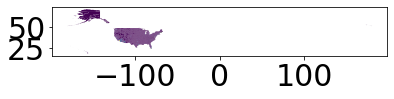

In [56]:
map_data.plot(column = "Population")

In [57]:
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


In [58]:
dates = ndsoy_data.groupby("date").mean().index
for date in dates:
    print(date, len(ndsoy_data[ndsoy_data.index.get_level_values("date")==date]))

1989-01-01 00:00:00 33
1990-01-01 00:00:00 34
1991-01-01 00:00:00 28
1992-01-01 00:00:00 30
1993-01-01 00:00:00 24
1994-01-01 00:00:00 28
1995-01-01 00:00:00 28
1996-01-01 00:00:00 22
1997-01-01 00:00:00 31
1998-01-01 00:00:00 34
1999-01-01 00:00:00 32
2000-01-01 00:00:00 35
2001-01-01 00:00:00 40
2002-01-01 00:00:00 39
2003-01-01 00:00:00 36
2004-01-01 00:00:00 37
2005-01-01 00:00:00 34
2006-01-01 00:00:00 34
2007-01-01 00:00:00 38
2008-01-01 00:00:00 30
2009-01-01 00:00:00 28
2010-01-01 00:00:00 35
2011-01-01 00:00:00 33
2012-01-01 00:00:00 46
2013-01-01 00:00:00 27
2014-01-01 00:00:00 33
2015-01-01 00:00:00 32
2016-01-01 00:00:00 36
2017-01-01 00:00:00 50
2018-01-01 00:00:00 35
2019-01-01 00:00:00 34


In [59]:
def create_ndsoy_geo_dataframe(ndsoy_data, map_data, dates):
    # create geopandas dataframe with multiindex for date
    # original geopandas dataframe had no dates, so copies of the df are 
    # stacked vertically, with a new copy for each date in the ndsoy_data index
    #(dates is a global)
    data_frame_initialized = False
    counties = ndsoy_data.groupby("fips_code").mean().index
    for date in dates:
        # select county observations from each date in dates
        # select only the subset of counties in the map that
        # are also present in the covid_data
        agg_df = map_data.loc[counties]
        agg_df["date"] = date
        if data_frame_initialized == False:
            #Create new dataframe
            matching_gpd = geopandas.GeoDataFrame(agg_df, crs = map_data.crs)
            data_frame_initialized = True        
        
        else:
            # or stack thenew  data frame and the dataframe that was initialized at
            # i = 0
            matching_gpd = matching_gpd.append(agg_df, ignore_index = False)
            
    # reset index, then set to [fips, date]
    matching_gpd.reset_index(inplace=True)
    matching_gpd.set_index(["fips_code", "date"], inplace = True)
    
    
    for key, val in ndsoy_data.items():
        matching_gpd[key] = val
    return matching_gpd

# dates will be used to create a geopandas DataFrame with multiindex 
#ndsoy_data[date] = ndsoy_data[date].astype(np.int64)
dates = ndsoy_data["production(bu)"].groupby("date").mean().index
ndsoy_data = create_ndsoy_geo_dataframe(ndsoy_data, map_data, dates)

In [60]:
ndsoy_data

,,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry,county,production(bu)
fips_code,date,,,,,,,,,,,,,
38001,1989-01-01,38,001,01034210,0500000US38001,Adams,06,2557900104,2894336,2216.0,North Dakota,"POLYGON ((-102.99571 46.20573, -102.99556 46.2...",NaN,NaN
38003,1989-01-01,38,003,01034225,0500000US38003,Barnes,06,3863107416,56591280,10415.0,North Dakota,"POLYGON ((-98.46732 47.06655, -98.46734 47.095...",BARNES,379200.0
38005,1989-01-01,38,005,01034216,0500000US38005,Benson,06,3596569006,131708143,6832.0,North Dakota,"POLYGON ((-99.84825 48.14069, -99.84782 48.195...",BENSON,8000.0
38009,1989-01-01,38,009,01034227,0500000US38009,Bottineau,06,4321196488,74864998,6282.0,North Dakota,"POLYGON ((-101.49674 48.99964, -101.45674 48.9...",BOTTINEAU,9600.0
38011,1989-01-01,38,011,01035619,0500000US38011,Bowman,06,3009306320,13587979,3024.0,North Dakota,"POLYGON ((-104.04580 46.11911, -104.04576 46.1...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38097,2019-01-01,38,097,01034221,0500000US38097,Traill,06,2232437901,1462184,8036.0,North Dakota,"POLYGON ((-97.47401 47.41144, -97.47391 47.439...",TRAILL,5728000.0
38099,2019-01-01,38,099,01034214,0500000US38099,Walsh,06,3319506407,32184273,10641.0,North Dakota,"POLYGON ((-98.31830 48.41323, -98.31825 48.456...",NaN,NaN
38101,2019-01-01,38,101,01034231,0500000US38101,Ward,06,5213657405,111223368,67641.0,North Dakota,"POLYGON ((-102.23391 48.63331, -102.23360 48.7...",WARD,5336000.0


In [51]:
ndsoy_data[ndsoy_data.index.get_level_values("date") == "1989-01-01"].loc[38001]["production(bu)"]



date
1989-01-01    <NA>
Name: production(bu), dtype: Int64

Text(0.5, 1.0, '2019-01-01 00:00:00\nSoybean Production in N.D.')

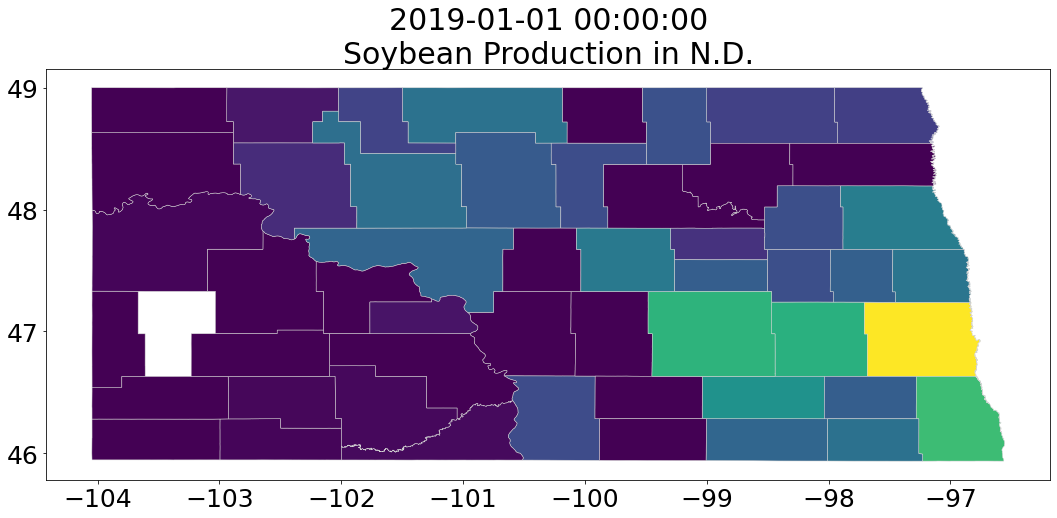

In [61]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

date = dates[-1]

# choose map bounds
if "map_bounded" not in locals():
    minx = -127
    miny = 23
    maxx = -66
    maxy = 48
    ndsoy_data = select_data_within_bounds(ndsoy_data, minx, miny, maxx, maxy)
    map_bounded = True
    
fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "production(bu)"
df = ndsoy_data[ndsoy_data.index.get_level_values("date") == date]
df.fillna(0).plot(ax=ax, cax = ax, column=key, linewidth=.5, 
             edgecolor='lightgrey')
ax.set_title(str(date) + "\n" + "Soybean Production in N.D.", fontsize = 30)

Text(0.5, 1.0, '2019-01-01 00:00:00\nSoy Production in N.D.')

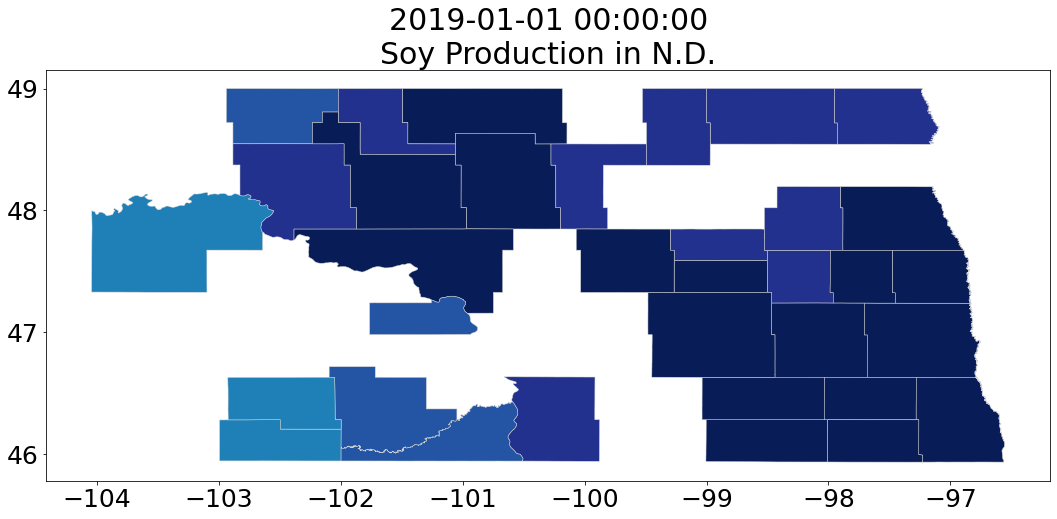

In [62]:
fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "production(bu)"
# change colors, divide into n distinct colors
cmap = cm.get_cmap('YlGnBu', 10)
vmin = 35 
vmax = df[key].max()

norm = cm.colors.LogNorm(vmin=vmin, vmax =vmax)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)
df = ndsoy_data[ndsoy_data.index.get_level_values("date") == date]
df.plot(ax=ax, cax = ax, column=key, vmin=vmin ,vmax = vmax, 
             cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
             norm = norm)

ax.set_title(str(date) + "\n" + "Soy Production in N.D.", fontsize = 30)

Text(0.5, 1.0, '2019-01-01\nSoybean Production in N.D.')

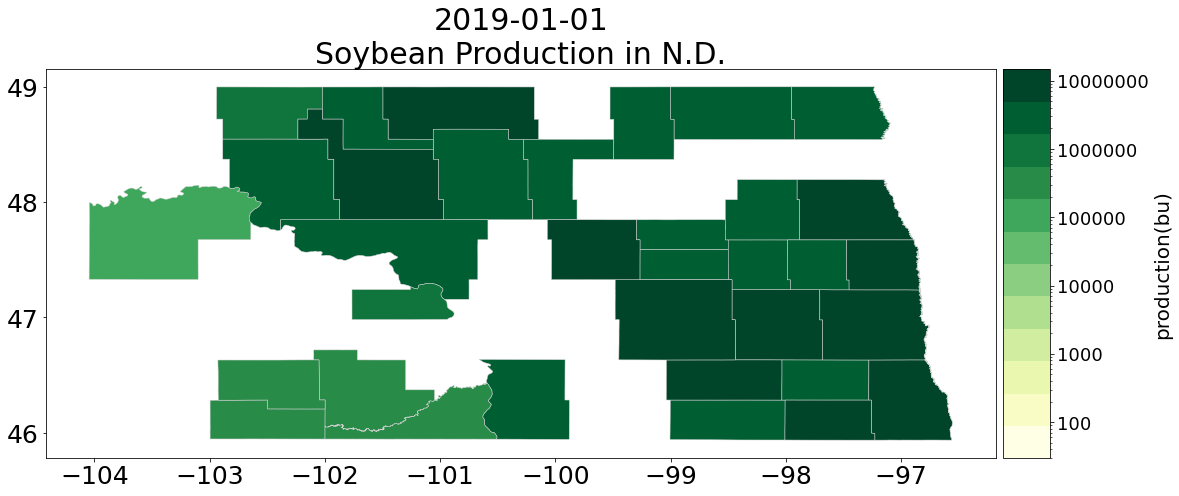

In [68]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(18,8),
        subplot_kw = {'aspect': 'equal'})   
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "production(bu)"
df = ndsoy_data[ndsoy_data.index.get_level_values("date")==date]
cmap = cm.get_cmap('YlGn', 12)
vmin = 30 
vmax = df[key].max()
norm = cm.colors.LogNorm(vmin=vmin, vmax =vmax)

#add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
#empty array for the data range
sm._A = []
#prepare space for colorbar
divider = make_axes_locatable(ax)
size = "5%" 
cax = divider.append_axes("right", size = size, pad = .1)
#add colorbar to figure
cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
cbar.ax.tick_params(labelsize=18)
vals = list(cbar.ax.get_yticks())
vals.append(vmax)
#format colorbar values as int
cbar.ax.set_yticklabels([int(x) for x in vals])
cbar.ax.set_ylabel(key, fontsize = 20)


df.plot(ax=ax, cax = ax, column=key, vmin=vmin ,vmax = vmax, 
             cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
             norm = norm)
ax.set_title(str(date)[:10] + "\n" + "Soybean Production in N.D.", fontsize = 30)

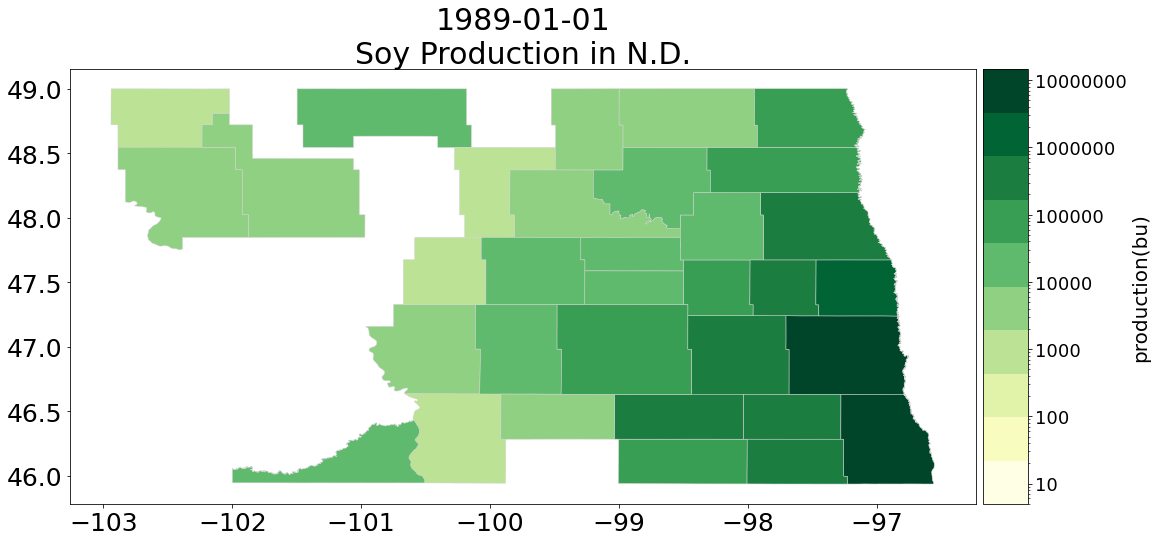

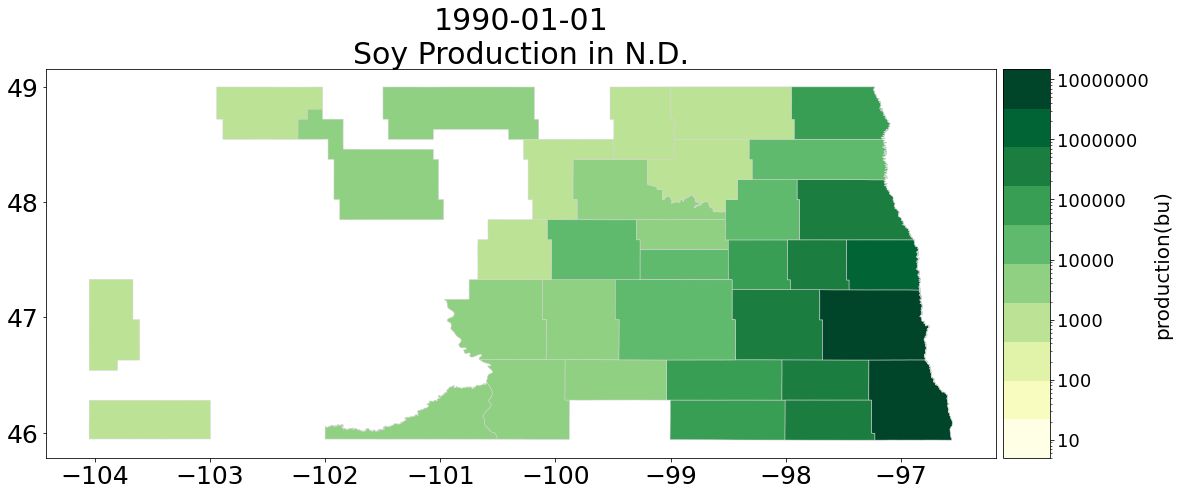

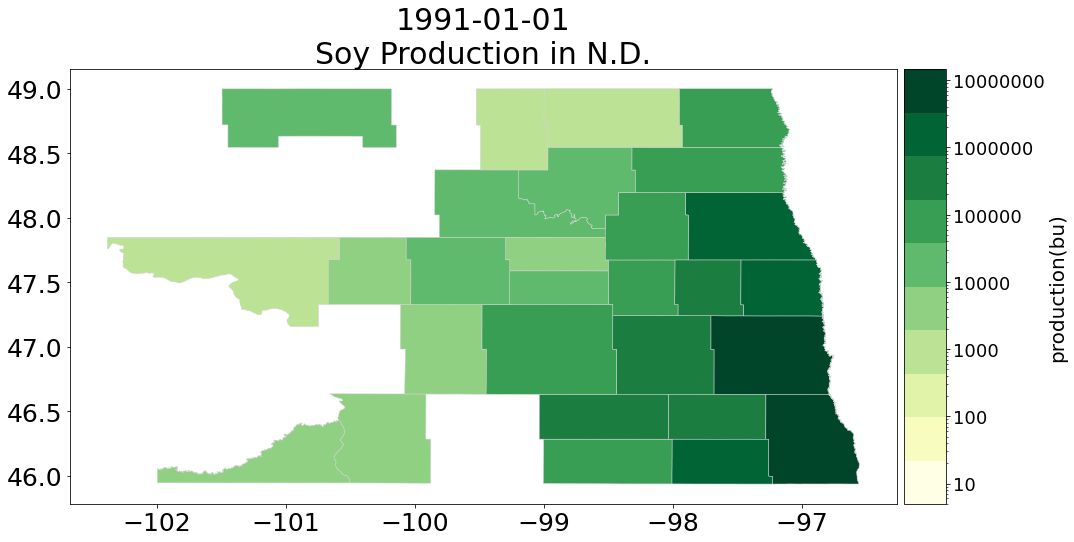

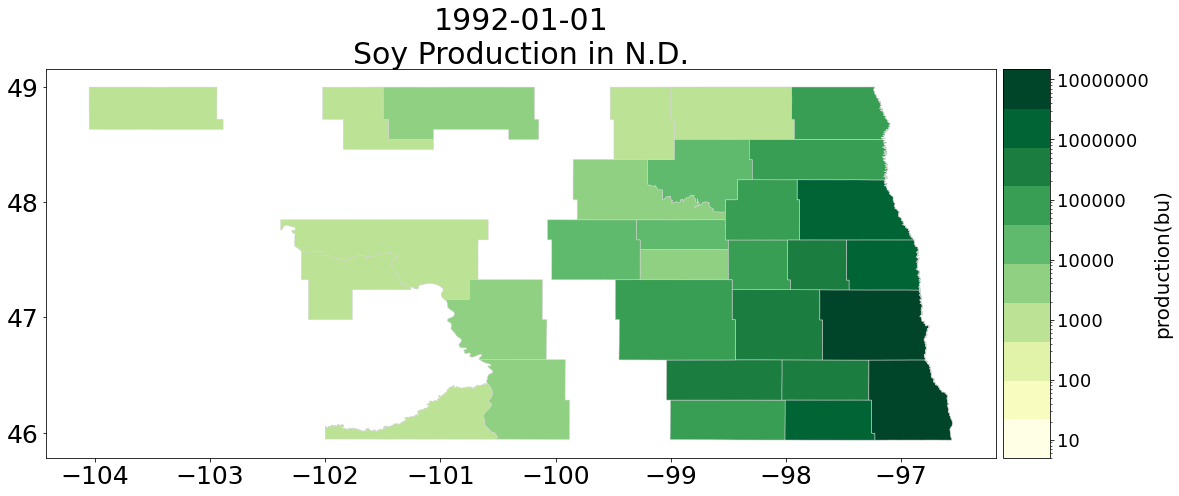

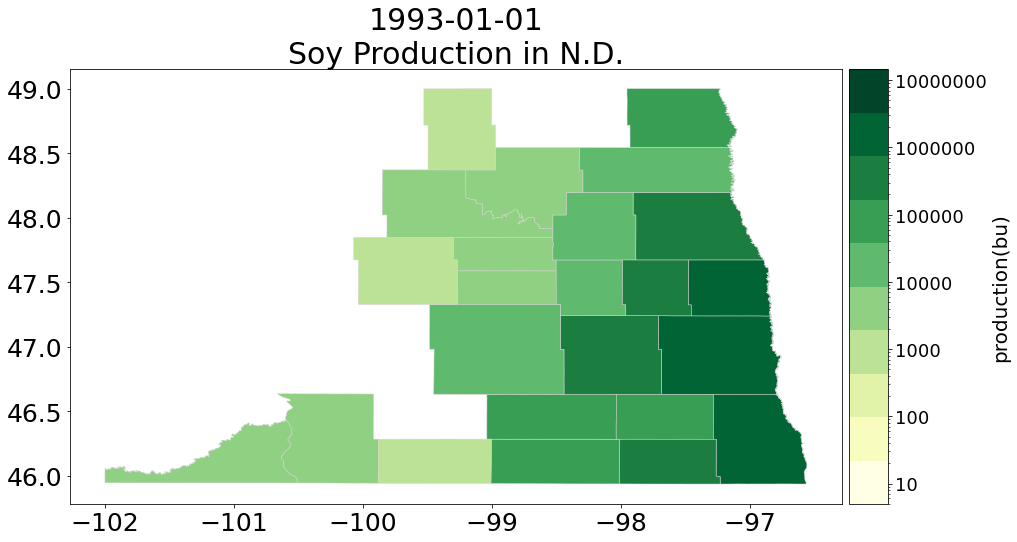

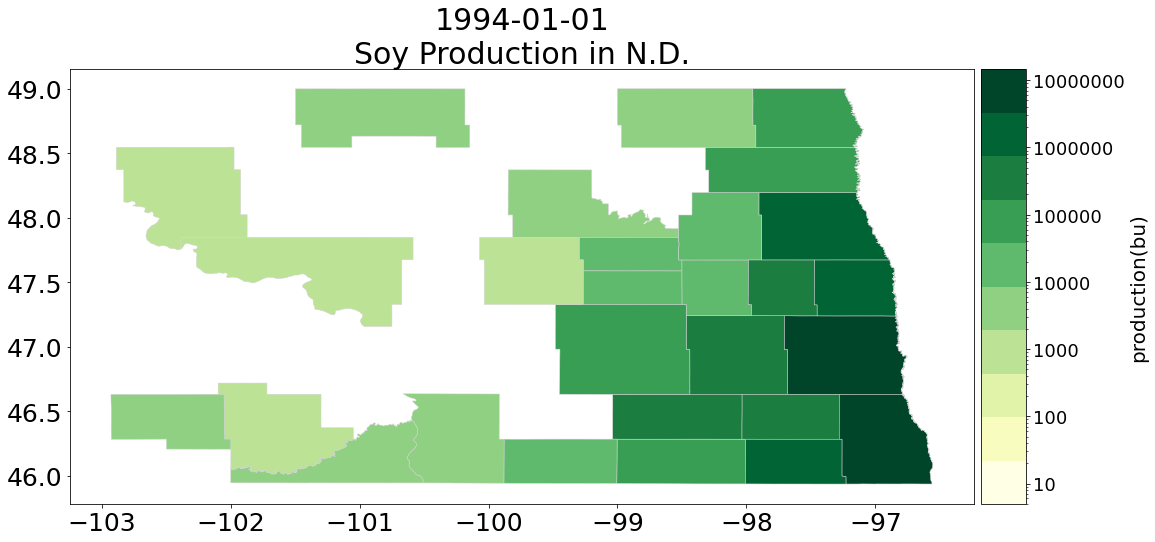

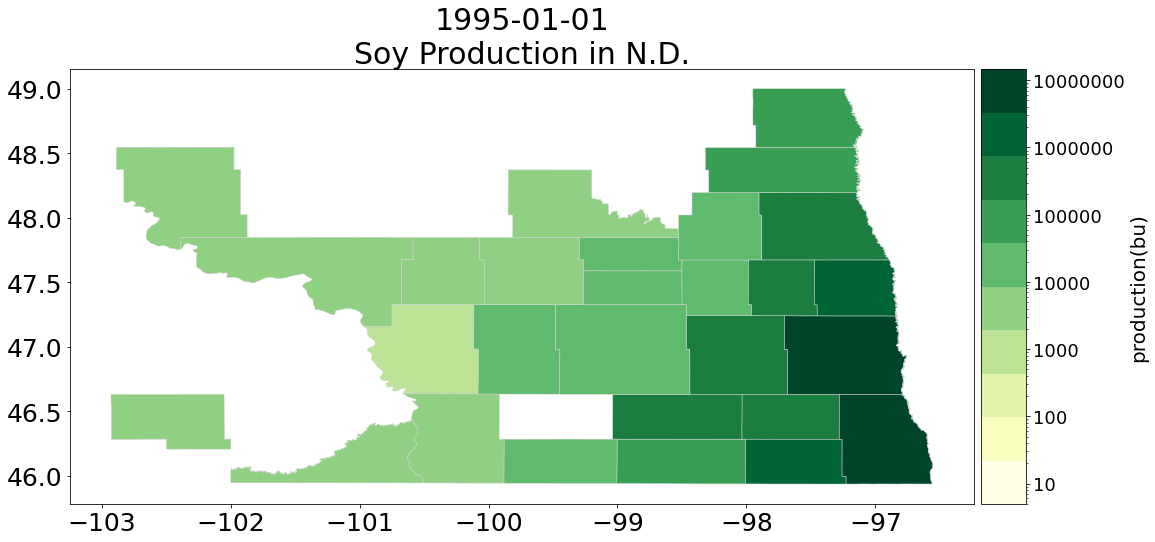

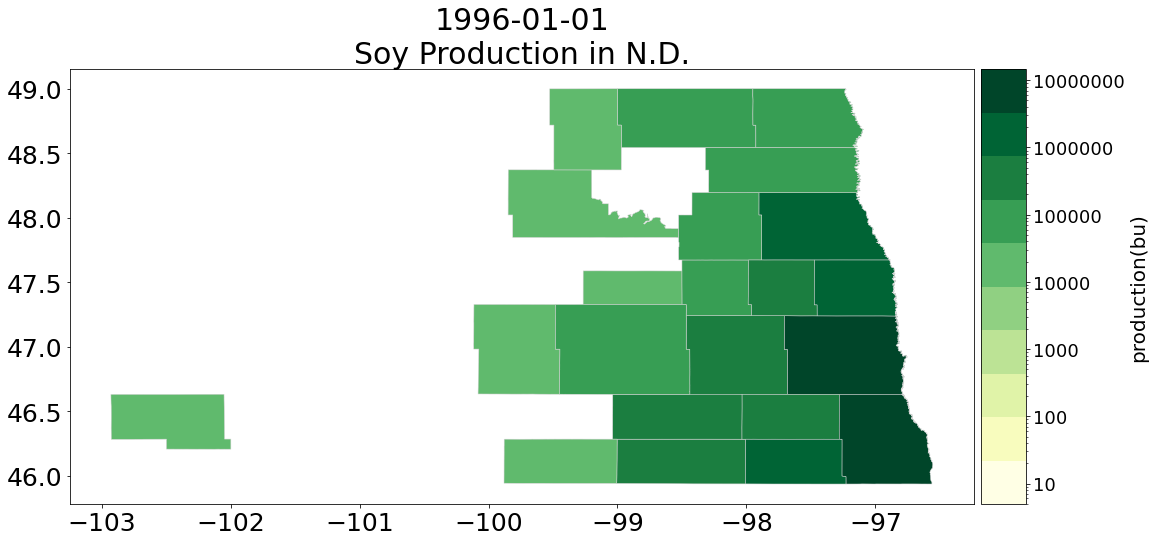

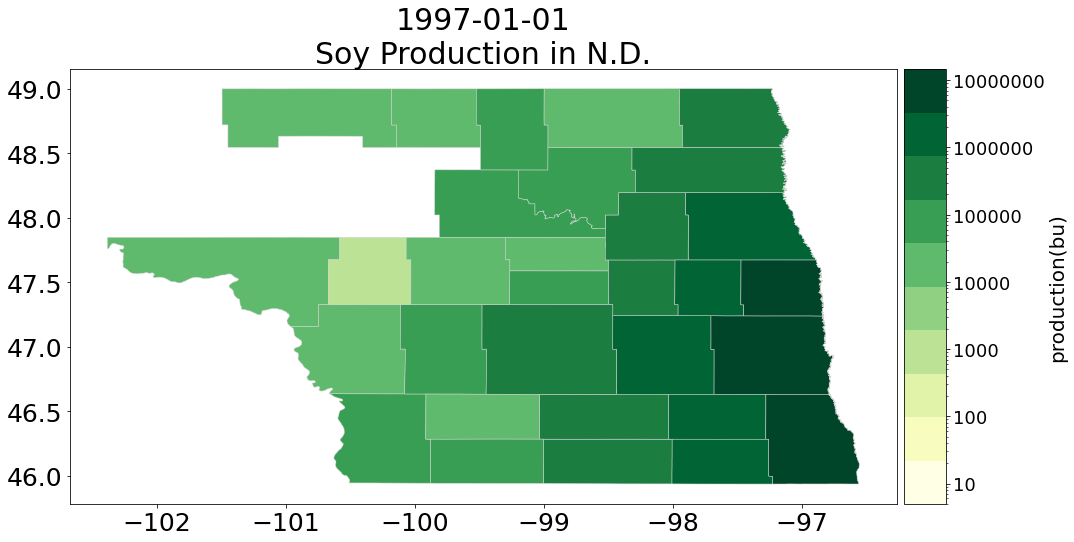

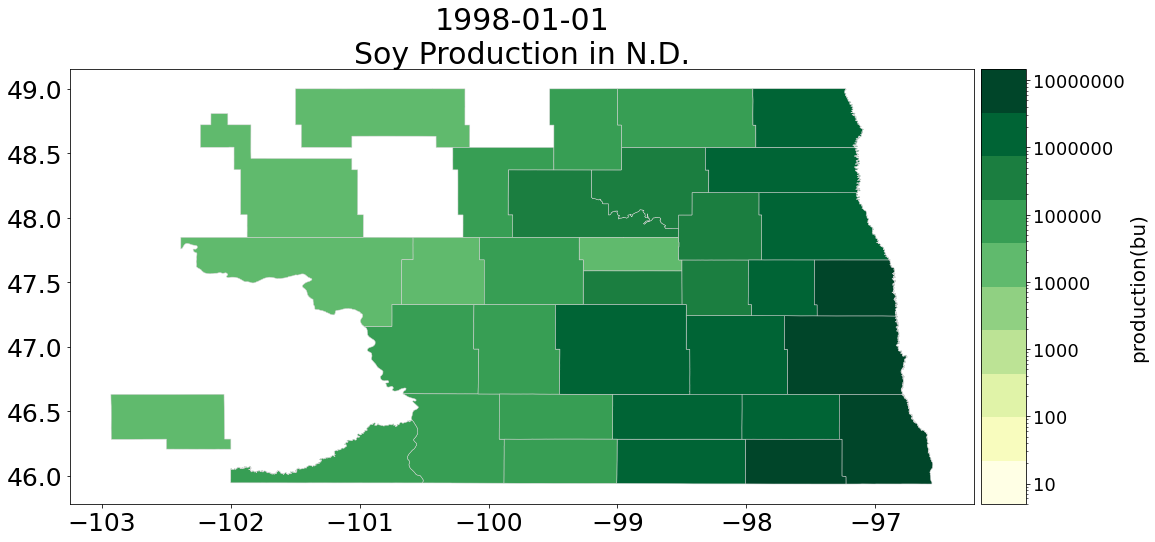

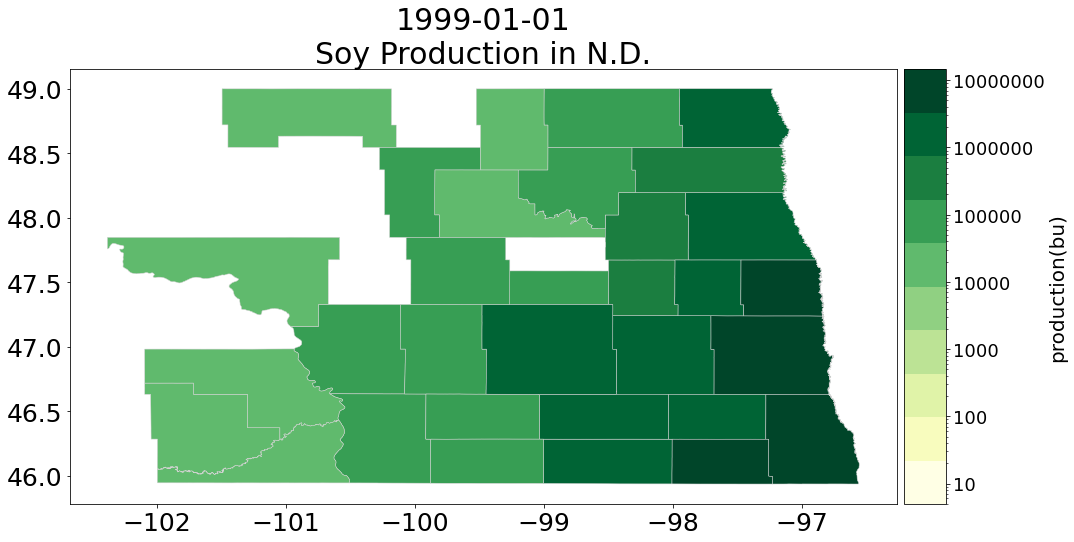

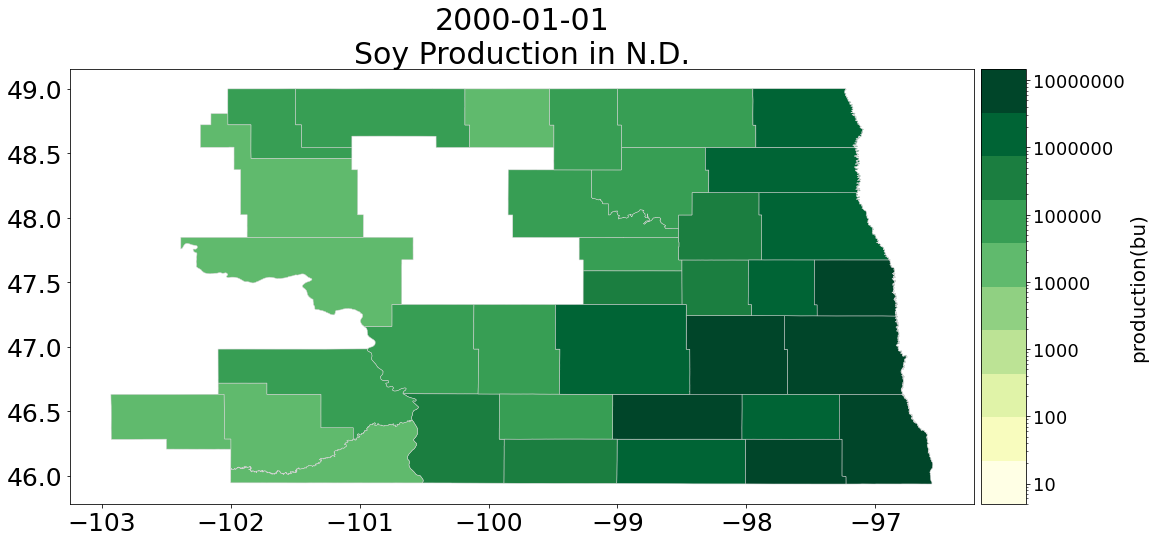

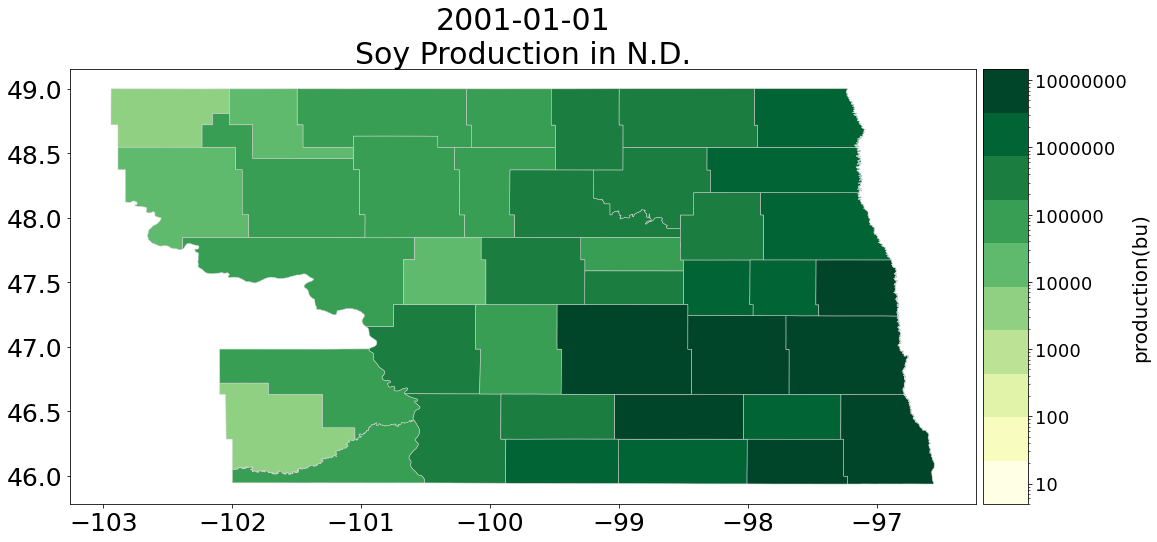

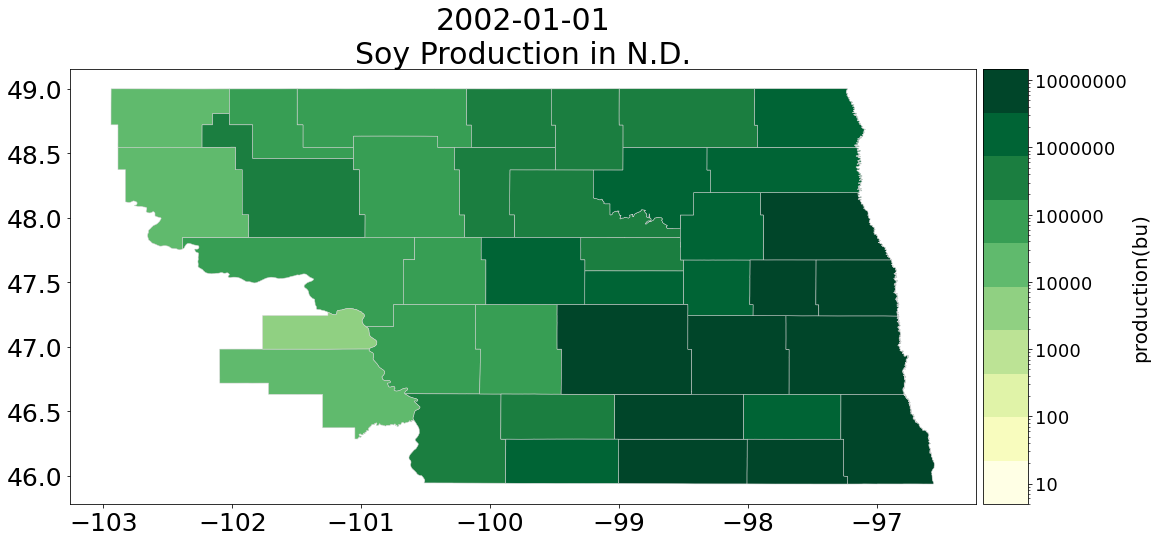

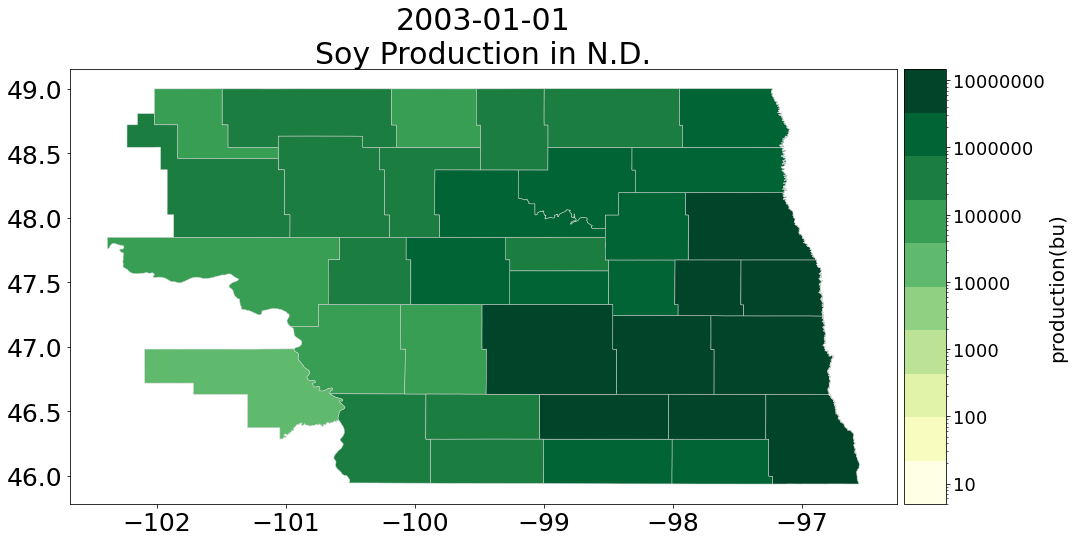

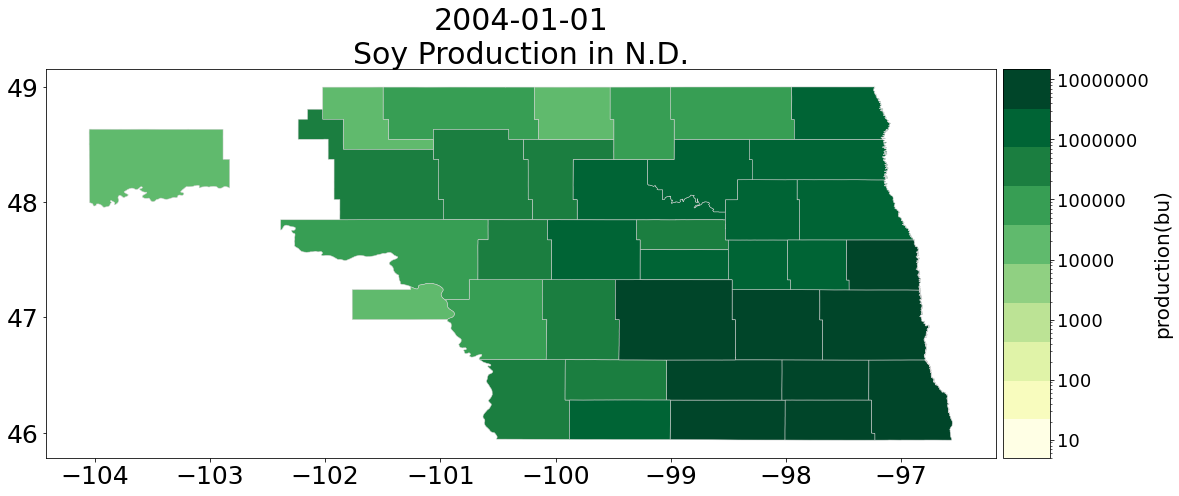

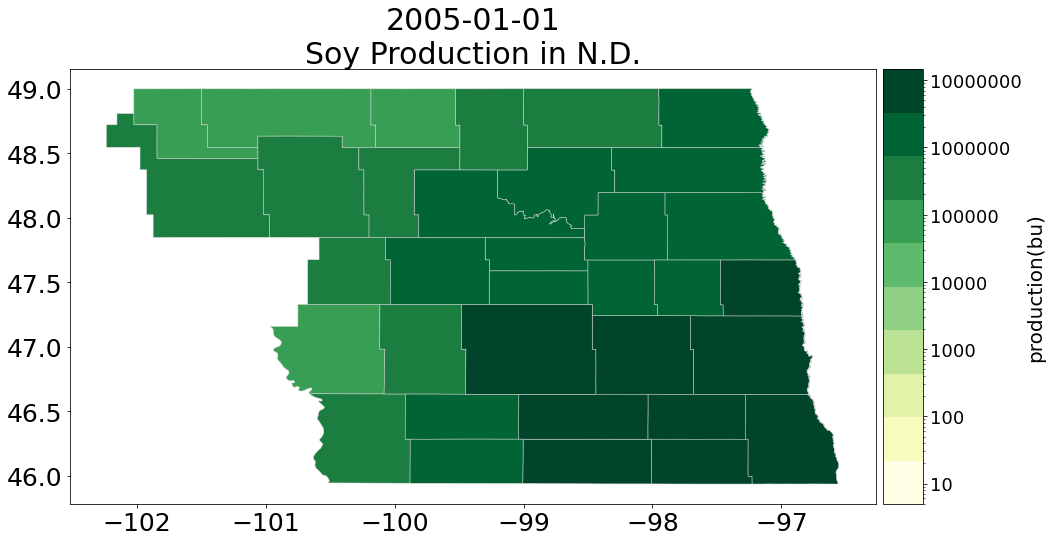

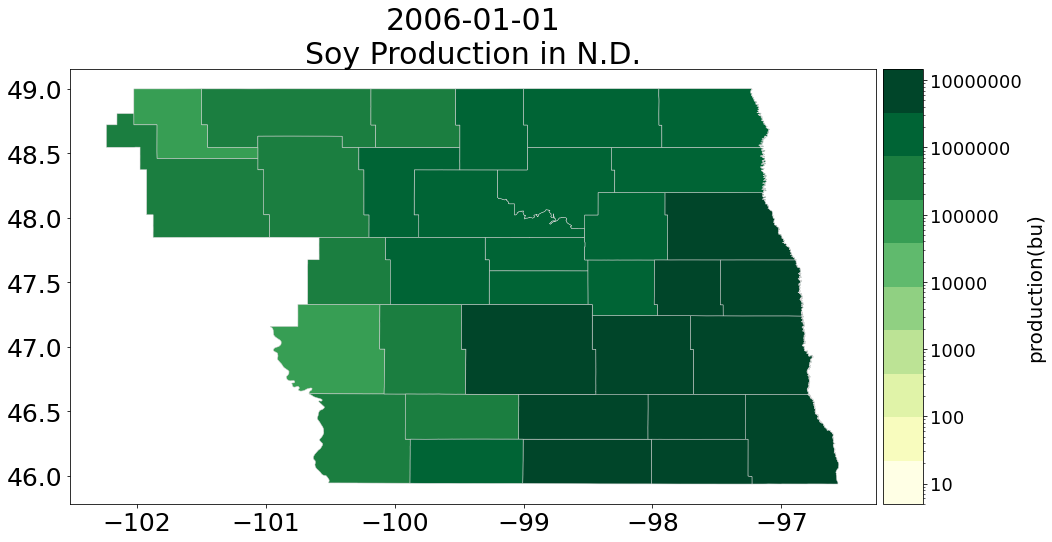

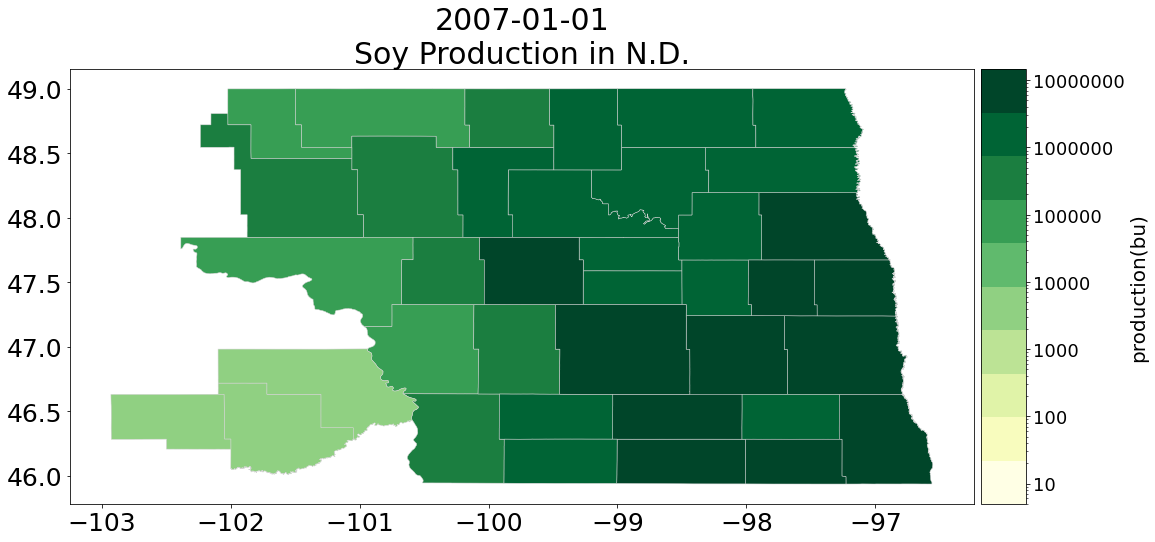

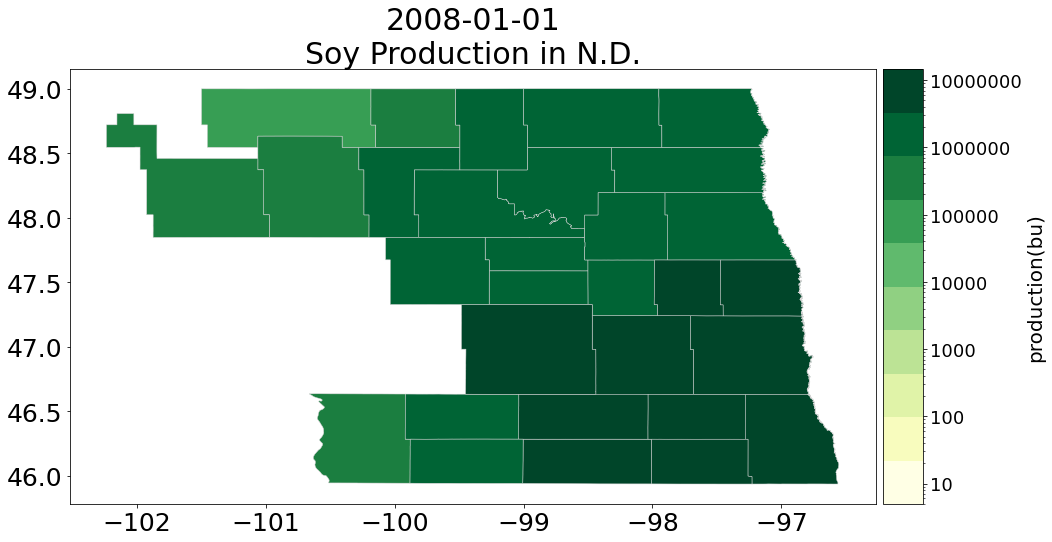

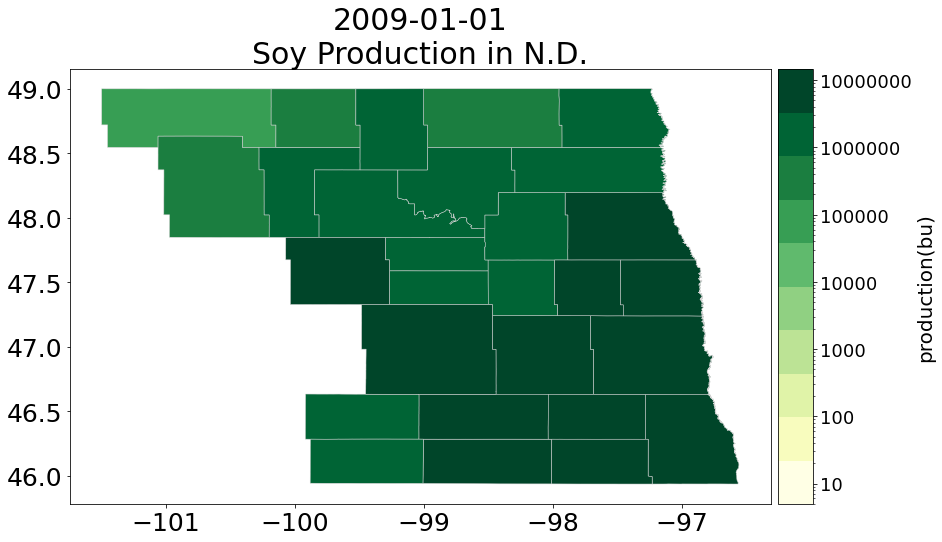

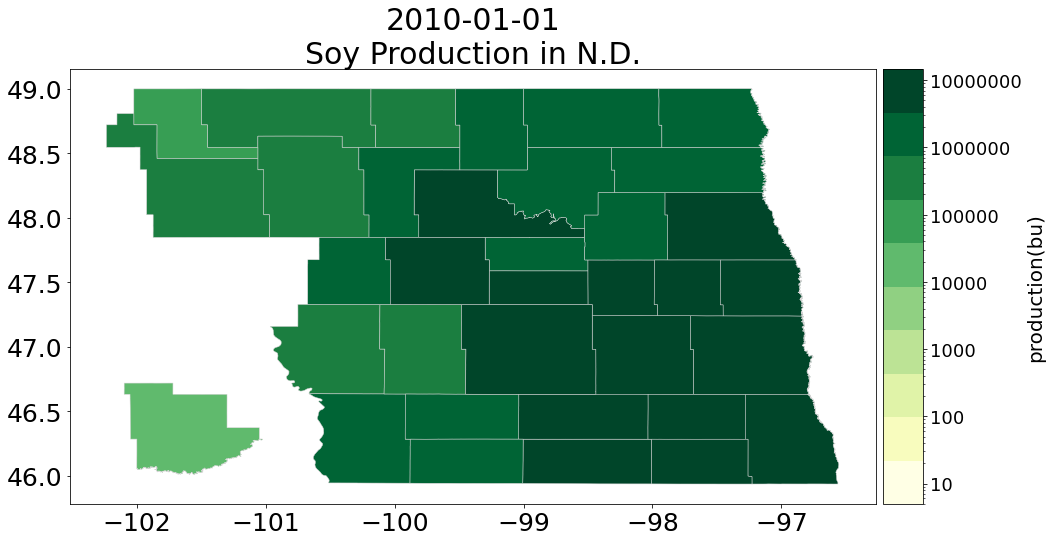

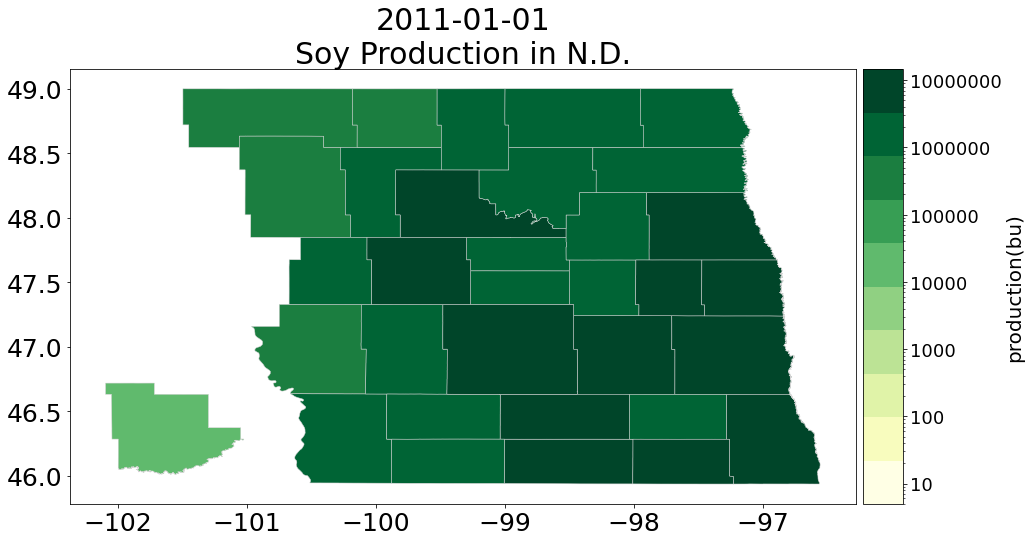

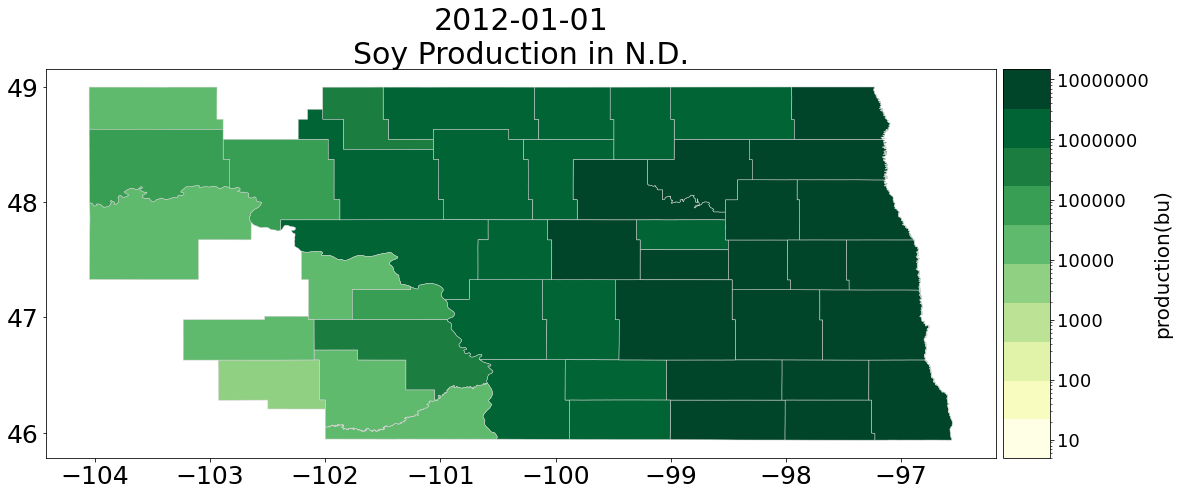

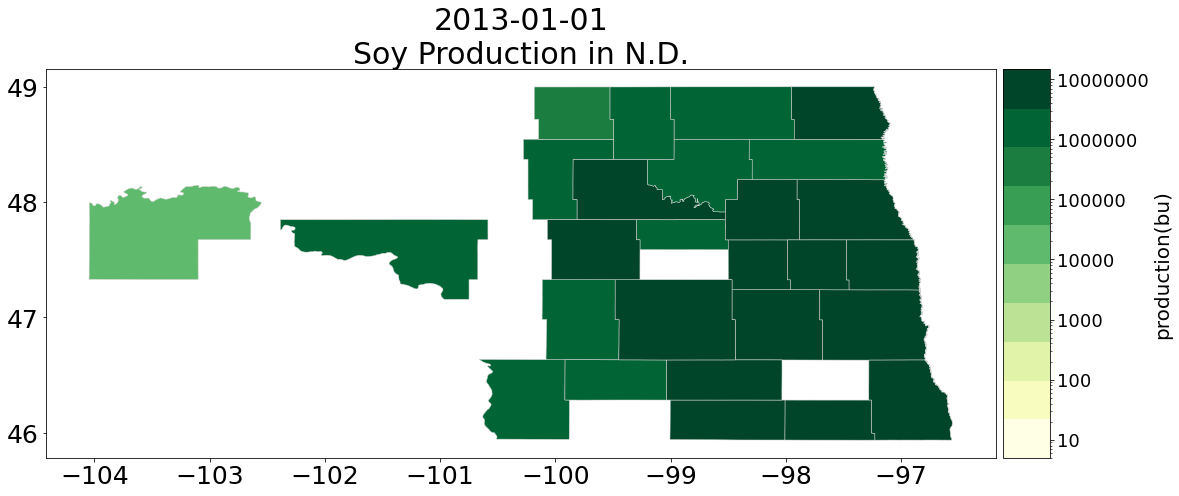

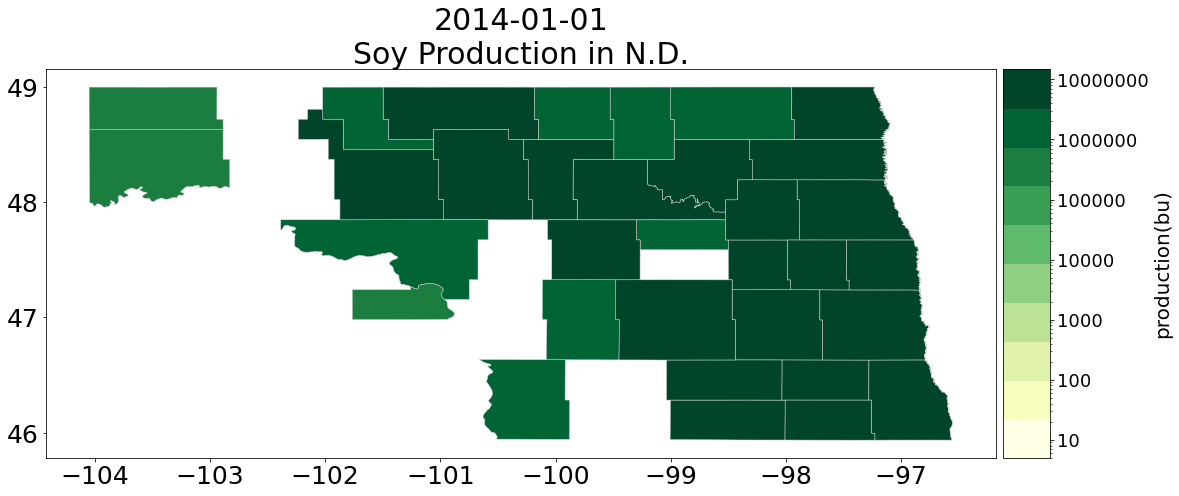

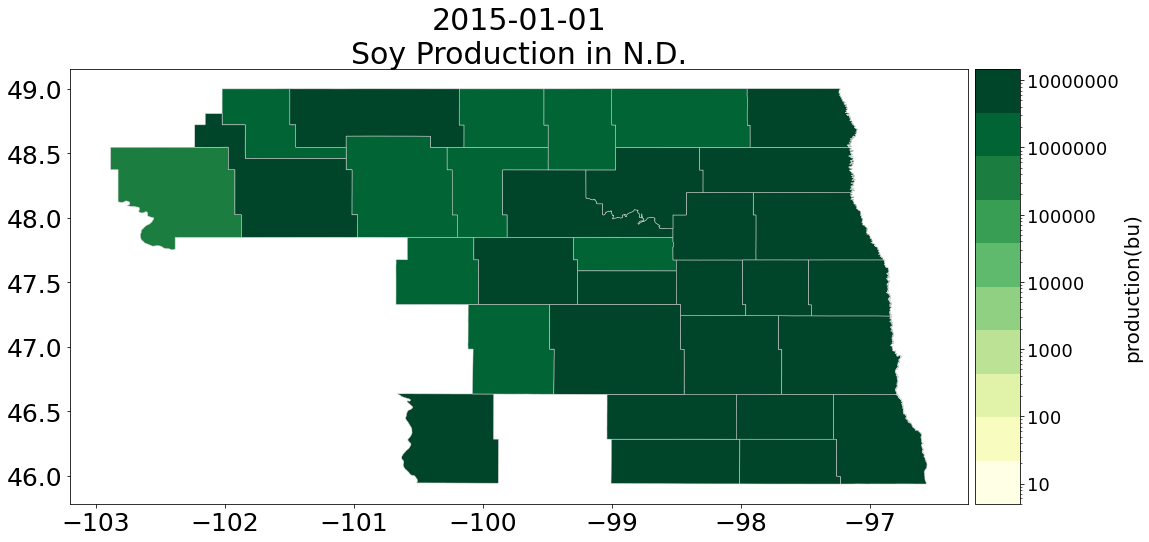

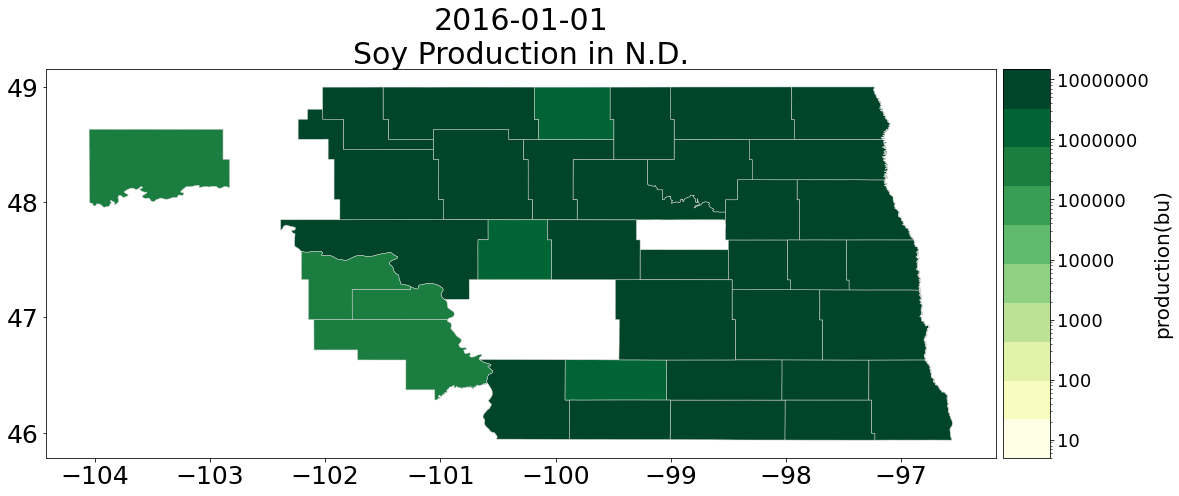

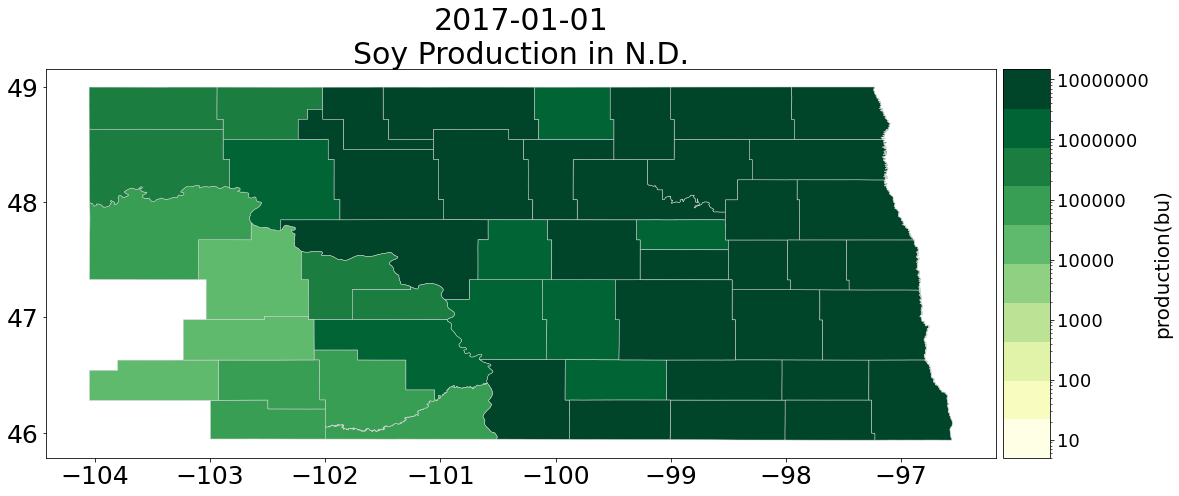

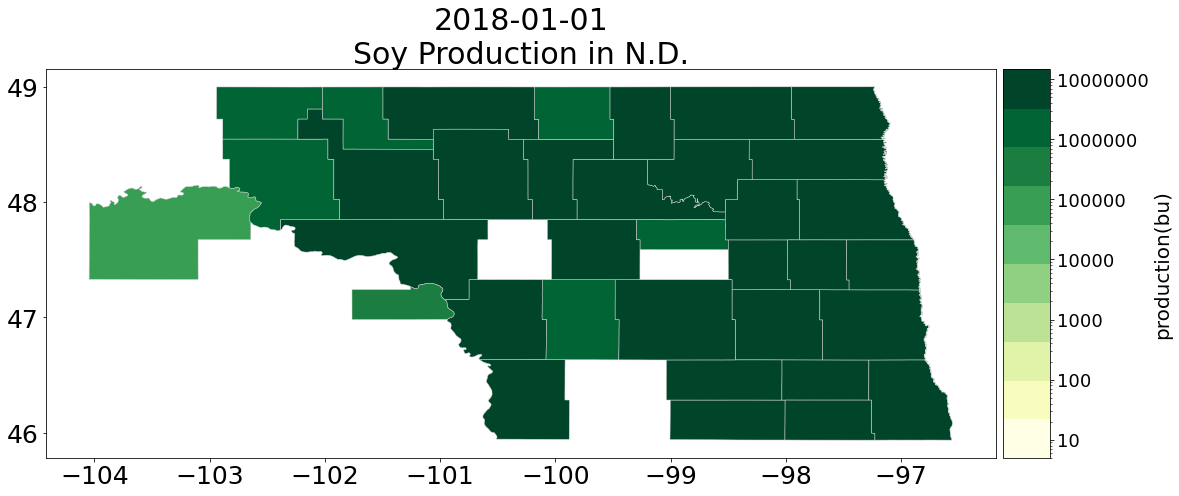

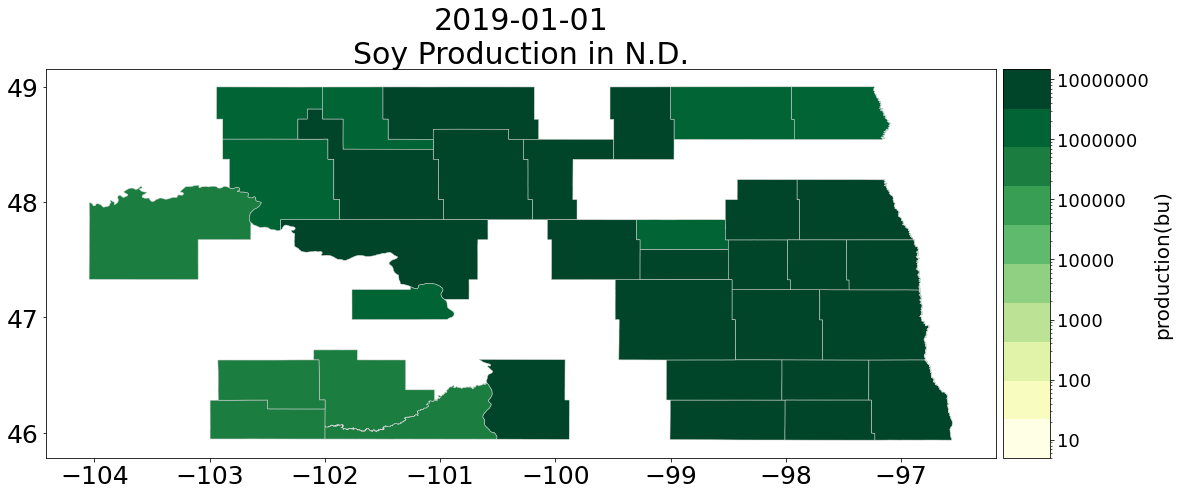

In [70]:
import geopandas
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
# If you choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages("NDSoyProduction_Map.pdf")

keys = ["production(bu)"]

dates = sorted(list(set(ndsoy_data.index.get_level_values("date"))))
#dates = [date for date in dates if "15" in date]


for key in keys:
    vmin = 5 
    vmax = df[key].max()
    
    for date in dates:
        log = False if "Daily" in key else True
        fig, ax = plt.subplots(figsize=(18,8),
            subplot_kw = {'aspect': 'equal'})   
        plt.rcParams.update({"font.size": 30})
        plt.xticks(fontsize = 25)
        plt.yticks(fontsize = 25)
        # this time we replace 0 values with 1
        # so that these values show up as beige instead of as white
        # when color axis is logged
        df = ndsoy_data[ndsoy_data.index.get_level_values("date")==date].replace(0,1)
 
        # choose colormap
        cmap = cm.get_cmap('YlGn', 10)
        # format colormap
        if log:
            norm = cm.colors.LogNorm(vmin=vmin, vmax =vmax)
        else:
            norm = cm.colors.Normalize(vmin = vmin, vmax = vmax)
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        # empty array for the data range
        sm._A = []
        # prepare space for colorbar
        divider = make_axes_locatable(ax)
        size = "5%" 
        cax = divider.append_axes("right", size = size, pad = 0.1)
        # add colorbar to figure
        cbar = fig.colorbar(sm, cax=cax, cmap = cmap)
        cbar.ax.tick_params(labelsize=18)
        vals = list(cbar.ax.get_yticks())
        vals.append(vmax)

        # format colorbar values as int
        cbar.ax.set_yticklabels([int(x) for x in vals])
        cbar.ax.set_ylabel(key, fontsize = 20)


        df.plot(ax=ax, cax = cax, column=key, vmin=vmin ,vmax = vmax, 
                     cmap = cmap, legend=False, linewidth=.5, edgecolor='lightgrey', 
                     norm = norm)
        ax.set_title(str(date)[:10] + "\n" + "Soy Production in N.D.", fontsize = 30)

        plt.show()
        pp.savefig(fig, bbox_inches="tight")
        plt.close()
    
pp.close()